<a href="https://colab.research.google.com/github/dauparas/proteins/blob/master/blosum62.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use BLOSUM62 matrix to define a soft label loss.

https://en.wikipedia.org/wiki/BLOSUM

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC50453/

In [0]:
import numpy as np
import matplotlib.pyplot as plt

Pairs of AA frequencies for Blosum62.

In [0]:
r20 = np.array([ 12627.73,   3939.43,   2993.54,   3278.68,   3390.37,   2905.57,   4232.85,   4539.45,   1616.69,  29832.35,  23617.94,   4824.05,   5761.66,   6419.39,   3102.50,   5877.26,   9070.39,    886.51,   3859.61,  24458.47], np.float32)
r19 = np.array([3239.21,   2308.18,   1745.40,   1491.09,    862.22,   1684.00,   2168.88,   2079.76,   3790.82,   3443.82,   5505.85,   2489.43,   1423.89,  10562.84,   1126.86,   2566.42,   2346.22,   2211.24,  12765.13], np.float32)
r18 = np.array([1003.70,    662.10,    402.65,    404.11,    360.67,    566.56,    660.02,   1015.14,    377.94,    901.59 ,  1824.09,    677.71,    495.17  , 2115.89  ,  352.63 ,   715.91 ,   712.02 ,  8060.58], np.float32)
r17 = np.array([9264.29,   4435.93 ,  5571.65,   4724.65  , 2318.32 ,  3437.77   ,5106.27 ,  5446.48 ,  1853.12   ,6716.05  , 8281.94 ,  5847.29  ,2515.49 ,  2896.40 ,  3366.54,  11712.22 , 15591.62], np.float32)
r16 = np.array([15579.38  , 5646.43  , 7840.40 ,  6985.53 ,  2599.50 ,  4717.08  , 7360.29  , 9553.90 ,  2753.84 ,  4291.98 ,  6049.14  , 7728.29 ,  2132.99 ,  2975.00 ,  4151.82 , 15680.23], np.float32)
r15 = np.array([5374.35 ,  2386.63 ,  2143.28 ,  3083.07 ,   899.80 ,  2109.68 ,  3542.26  , 3398.98 ,  1190.29  , 2508.69 ,  3524.79 ,  3930.17 ,  1017.22  , 1308.84 , 23753.47], np.float32)
r14 = np.array([4076.59 ,  2321.82  , 1868.88 ,  1894.29  , 1280.49  , 1351.88 ,  2122.42  , 2984.24  , 2019.30  , 7589.45 , 13492.91 ,  2364.01  , 2965.57, 22771.30], np.float32)
r13 = np.array([3341.90  , 2001.08 ,  1319.20  , 1156.88  ,  939.80  , 1843.69  , 1692.11  , 1825.96   , 953.44  , 6249.52 , 12282.50  , 2264.38   ,5042.88], np.float32)
r12 = np.array([8338.88 , 15533.06 ,  6080.29  , 6092.99  , 1248.97 ,  7716.37  ,10296.37 ,  6327.07 ,  2958.56 ,  3900.98  , 6138.15  ,20074.90], np.float32)
r11 = np.array([11009.91  , 6028.42 ,  3411.38 ,  3787.90  , 3907.74  , 4030.19 ,  4990.96 ,  5198.87  , 2459.23 , 28361.76 , 46272.78], np.float32)
r10 = np.array([7943.72 ,  3098.65 ,  2477.68  , 3076.61  , 2730.06 ,  2220.18 ,  3037.90 ,  3450.79 ,  1447.42  ,22975.42], np.float32)
r9 = np.array([2759.96,  3091.55 ,  3563.41  , 2376.71  ,  572.50  , 2613.56 ,  3405.63  , 2387.39 , 11561.82], np.float32)
r8 = np.array([14491.39,   4291.00,   7124.25,   6284.36  , 1917.42,   3409.41 ,  4829.16 , 47098.64], np.float32)
r7 = np.array([7444.98,   6711.13 ,  5505.96 , 12248.73   , 955.29  , 8817.09,  20100.50], np.float32)
r6 = np.array([4794.70 ,  6194.03  , 3813.41 ,  4106.64 ,   770.86 ,  9131.13], np.float32)
r5 = np.array([3962.65,    980.88 ,  1092.50 ,   994.42  ,14864.71], np.float32)
r4 = np.array([5400.73,   3953.21,   9269.63,  26504.98], np.float32)
r3 = np.array([4857.14,   4930.09 , 17616.72], np.float32)
r2 = np.array([5848.09 , 22123.18], np.float32)
r1 = np.array([26782.81], np.float32)

In [0]:
rr1 = np.concatenate([r1,np.zeros(19)])
rr2 = np.concatenate([r2,np.zeros(18)])
rr3 = np.concatenate([r3,np.zeros(17)])
rr4 = np.concatenate([r4,np.zeros(16)])
rr5 = np.concatenate([r5,np.zeros(15)])
rr6 = np.concatenate([r6,np.zeros(14)])
rr7 = np.concatenate([r7,np.zeros(13)])
rr8 = np.concatenate([r8,np.zeros(12)])
rr9 = np.concatenate([r9,np.zeros(11)])
rr10 = np.concatenate([r10,np.zeros(10)])
rr11 = np.concatenate([r11,np.zeros(9)])
rr12 = np.concatenate([r12,np.zeros(8)])
rr13 = np.concatenate([r13,np.zeros(7)])
rr14 = np.concatenate([r14,np.zeros(6)])
rr15 = np.concatenate([r15,np.zeros(5)])
rr16 = np.concatenate([r16,np.zeros(4)])
rr17 = np.concatenate([r17,np.zeros(3)])
rr18 = np.concatenate([r18,np.zeros(2)])
rr19 = np.concatenate([r19,np.zeros(1)])
rr20 = r20

In [0]:
blosum62 = np.concatenate([rr1[:,None], rr2[:,None], rr3[:,None], rr4[:,None], rr5[:,None], rr6[:,None], rr7[:,None], rr8[:,None], rr9[:,None], rr10[:,None], rr11[:,None], rr12[:,None], rr13[:,None], rr14[:,None], rr15[:,None], rr16[:,None], rr17[:,None], rr18[:,None], rr19[:,None], rr20[:,None]], axis=-1)

In [0]:
f_ij = 0.5*(blosum62.T+blosum62)

In [0]:
total_number_of_pairs = np.sum(f_ij)

In [131]:
total_number_of_pairs

1245852.5342712402

In [0]:
p_i = np.array([0.074, 0.052, 0.045, 0.054, 0.025, 0.034, 0.054, 0.074, 0.026, 0.068, 0.099, 0.058, 0.025, 0.047, 0.039, 0.057, 0.051, 0.013, 0.032, 0.073], np.float32)

In [137]:
np.sum(f_ij[0,:])/total_number_of_pairs

0.07421621594883439

In [138]:
np.sum(f_ij[1,:])/total_number_of_pairs

0.05161448273351782

In [139]:
np.sum(f_ij[2,:])/total_number_of_pairs

0.04464580586204264

In [0]:
number_of_AA = np.array([72060,    47671 ,   38063  ,  48555 ,   22533   , 31697  ,  54594  ,  77275 ,   22870  ,  57132  ,  84849  ,  51457  ,  22248  ,  40562  ,  39717  ,  54328   , 50667 ,   12772 ,   31580,    66446], np.float32)

In [0]:
f_i = number_of_AA/np.sum(number_of_AA)

In [0]:
p_ij = f_ij/np.sum(f_ij)

In [169]:
p_ij

array([[0.02149758, 0.00234702, 0.00194932, 0.00216748, 0.00159034,
        0.00192426, 0.00298791, 0.00581585, 0.00110766, 0.00318807,
        0.00441862, 0.00334666, 0.00134121, 0.00163606, 0.0021569 ,
        0.0062525 , 0.00371805, 0.00040282, 0.0013    , 0.00506791],
       [0.00234702, 0.01775746, 0.0019786 , 0.00158655, 0.00039366,
        0.00248586, 0.00269339, 0.00172211, 0.00124074, 0.00124359,
        0.0024194 , 0.00623391, 0.0008031 , 0.00093182, 0.00095783,
        0.00226609, 0.00178028, 0.00026572, 0.00092635, 0.00158102],
       [0.00194932, 0.0019786 , 0.01414029, 0.0037202 , 0.00043845,
        0.00153044, 0.00220972, 0.00285919, 0.00143011, 0.00099437,
        0.00136909, 0.00244021, 0.00052944, 0.00075004, 0.00086017,
        0.0031466 , 0.00223608, 0.0001616 , 0.00070048, 0.0012014 ],
       [0.00216748, 0.00158655, 0.0037202 , 0.02127457, 0.00039909,
        0.00164812, 0.0049158 , 0.00252211, 0.00095385, 0.00123474,
        0.0015202 , 0.00244531, 0.00046429, 0

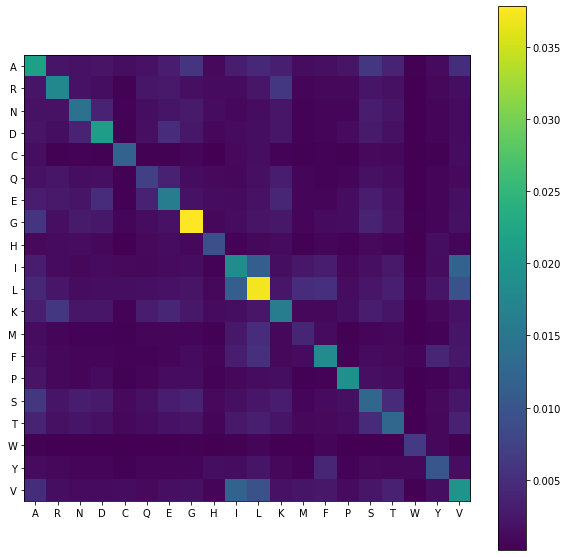

In [154]:
plt.figure(figsize=(10,10))
plt.imshow(p_ij)
plt.xticks(np.arange(20), alphabet)
plt.yticks(np.arange(20), alphabet)
plt.colorbar()

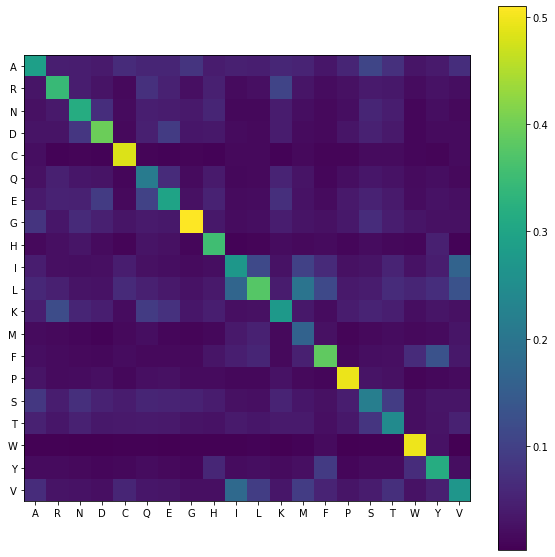

In [157]:
plt.figure(figsize=(10,10))
plt.imshow(p_ij/np.sum(p_ij, axis=0)[None,:])
plt.xticks(np.arange(20), alphabet)
plt.yticks(np.arange(20), alphabet)
plt.colorbar()

In [159]:
np.sum(p_ij/np.sum(p_ij, axis=0)[None,:], axis=0) #rows sum to 1.0

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

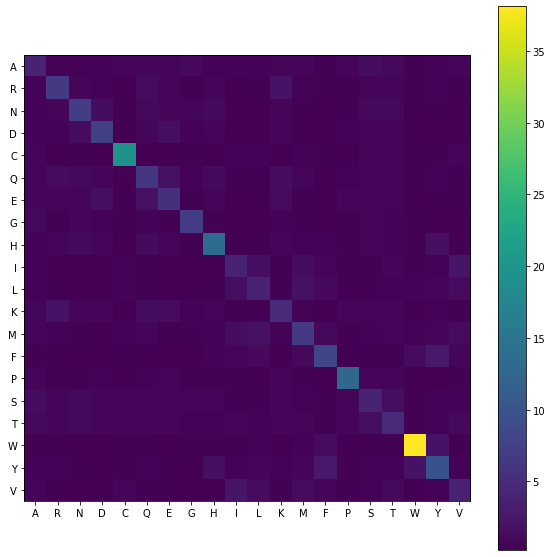

In [160]:
plt.figure(figsize=(10,10))
plt.imshow(p_ij/(np.sum(p_ij, axis=0)[None,:]*np.sum(p_ij, axis=1)[:,None]))
plt.xticks(np.arange(20), alphabet)
plt.yticks(np.arange(20), alphabet)
plt.colorbar()

In [0]:
alphabet = 'ARNDCQEGHILKMFPSTWYV'

In [0]:
blosum62 = np.array([
[ 4, -1, -2, -2,  0, -1, -1,  0, -2, -1, -1, -1, -1, -2, -1,  1,  0, -3, -2,  0],
[-1,  5,  0, -2, -3,  1,  0, -2,  0, -3, -2,  2, -1, -3, -2, -1, -1, -3, -2, -3],
[-2,  0,  6,  1, -3,  0,  0,  0,  1, -3, -3,  0, -2, -3, -2,  1,  0, -4, -2, -3],
[-2, -2,  1,  6, -3,  0,  2, -1, -1, -3, -4, -1, -3, -3, -1,  0, -1, -4, -3, -3],
[ 0, -3, -3, -3,  9, -3, -4, -3, -3, -1, -1, -3, -1, -2, -3, -1, -1, -2, -2, -1],
[-1,  1,  0,  0, -3,  5,  2, -2,  0, -3, -2,  1,  0, -3, -1,  0, -1, -2, -1, -2],
[-1,  0,  0,  2, -4,  2,  5, -2,  0, -3, -3,  1, -2, -3, -1,  0, -1, -3, -2, -2],
[ 0, -2,  0, -1, -3, -2, -2,  6, -2, -4, -4, -2, -3, -3, -2,  0, -2, -2, -3, -3],
[-2,  0,  1, -1, -3,  0,  0, -2,  8, -3, -3, -1, -2, -1, -2, -1, -2, -2,  2, -3],
[-1, -3, -3, -3, -1, -3, -3, -4, -3,  4,  2, -3,  1,  0, -3, -2, -1, -3, -1,  3],
[-1, -2, -3, -4, -1, -2, -3, -4, -3,  2,  4, -2,  2,  0, -3, -2, -1, -2, -1,  1],
[-1,  2,  0, -1, -3,  1,  1, -2, -1, -3, -2,  5, -1, -3, -1,  0, -1, -3, -2, -2],
[-1, -1, -2, -3, -1,  0, -2, -3, -2,  1,  2, -1,  5,  0, -2, -1, -1, -1, -1,  1],
[-2, -3, -3, -3, -2, -3, -3, -3, -1,  0,  0, -3,  0,  6, -4, -2, -2,  1,  3, -1],
[-1, -2, -2, -1, -3, -1, -1, -2, -2, -3, -3, -1, -2, -4,  7, -1, -1, -4, -3, -2],
[ 1, -1,  1,  0, -1,  0,  0,  0, -1, -2, -2,  0, -1, -2, -1,  4,  1, -3, -2, -2],
[ 0, -1,  0, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -2, -1,  1,  5, -2, -2,  0],
[-3, -3, -4, -4, -2, -2, -3, -2, -2, -3, -2, -3, -1,  1, -4, -3, -2, 11,  2, -3],
[-2, -2, -2, -3, -2, -1, -2, -3,  2, -1, -1, -2, -1,  3, -3, -2, -2,  2,  7, -1],
[ 0, -3, -3, -3, -1, -2, -2, -3, -3,  3,  1, -2,  1, -1, -2, -2,  0, -3, -1,  4]])

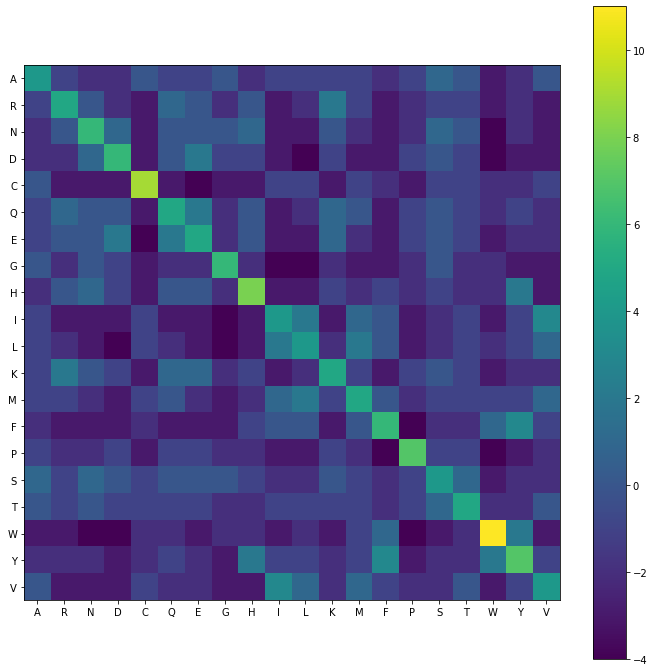

In [0]:
plt.figure(figsize=(12,12))
plt.imshow(blosum62)
plt.xticks(np.arange(20), alphabet)
plt.yticks(np.arange(20), alphabet)
plt.colorbar()

In [0]:
temperature = 2.0
similarity_matrix = np.exp(blosum62/temperature)/np.sum(np.exp(blosum62/temperature), axis=-1)[:,None]
np.sum(similarity_matrix[0,:])

0.9999999999999999

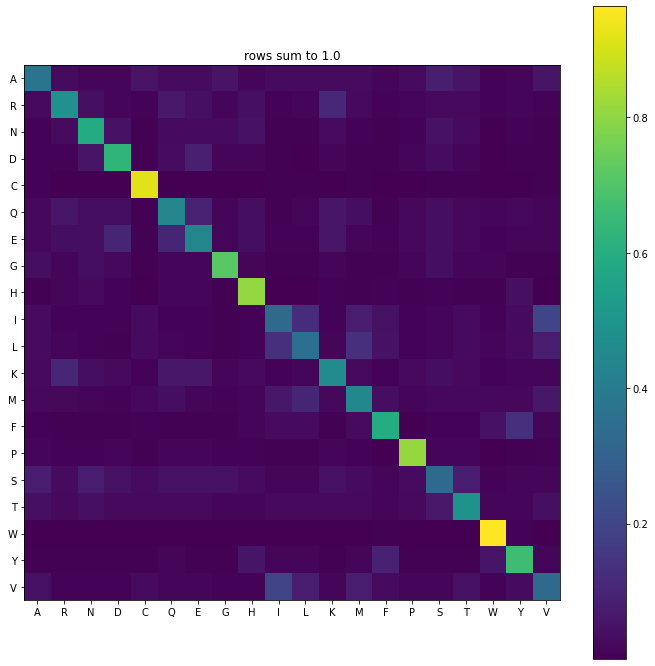

In [0]:
plt.figure(figsize=(12,12))
plt.imshow(similarity_matrix)
plt.xticks(np.arange(20), alphabet)
plt.yticks(np.arange(20), alphabet)
plt.title('rows sum to 1.0')
plt.colorbar()

In [0]:
np.diag(similarity_matrix)

array([0.37033142, 0.48865494, 0.59505289, 0.63101735, 0.92154819,
       0.43876768, 0.4416068 , 0.71679214, 0.80896847, 0.33321174,
       0.35349173, 0.46495512, 0.45173483, 0.59782346, 0.81301554,
       0.3294215 , 0.49250218, 0.96395878, 0.66659144, 0.33335154])

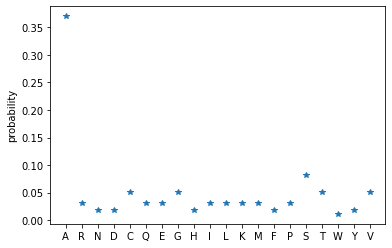

In [0]:
plt.plot(similarity_matrix[0,:],'*');
plt.xticks(np.arange(20), alphabet);
plt.ylabel('probability');

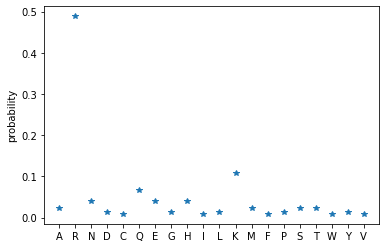

In [0]:
plt.plot(similarity_matrix[1,:],'*');
plt.xticks(np.arange(20), alphabet);
plt.ylabel('probability');

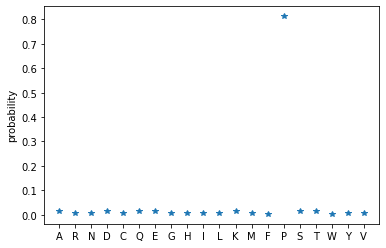

In [0]:
plt.plot(similarity_matrix[14,:],'*');
plt.xticks(np.arange(20), alphabet);
plt.ylabel('probability');

In [0]:
seq = np.random.randint(0,20,size=(64))

In [0]:
seq_1hot = np.eye(20)[seq]

In [0]:
seq_1hot.shape

(64, 20)

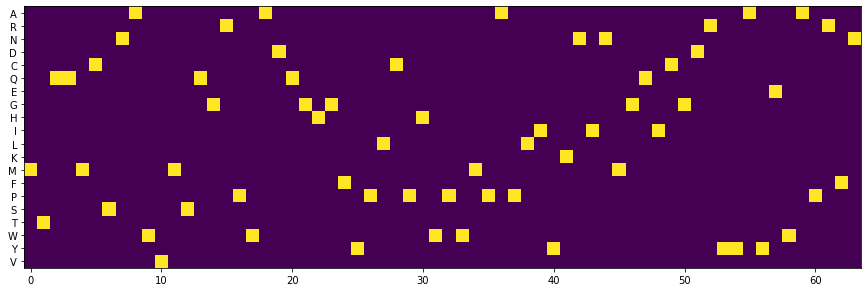

In [0]:
plt.figure(figsize=(15,12))
plt.imshow(seq_1hot.T)
plt.yticks(np.arange(20), alphabet);

In [0]:
soft_labels = seq_1hot @ similarity_matrix

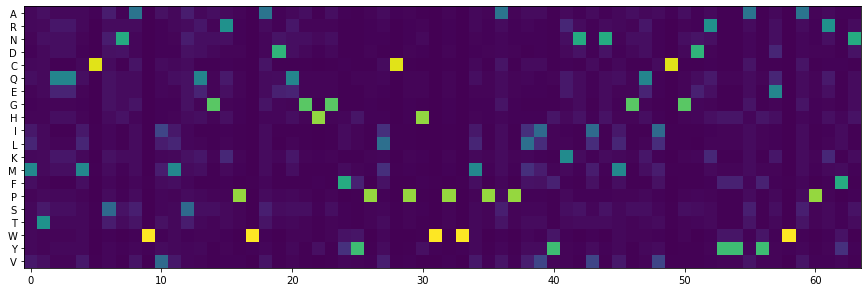

In [0]:
plt.figure(figsize=(15,12))
plt.imshow(soft_labels.T)
plt.yticks(np.arange(20), alphabet);